In [1]:
from nrmkindy.indy_script import *

In [2]:
import time

In [3]:
host_ip='192.168.0.63'

config_script(NAME_INDY_7)
start_script(host_ip)
blending_type(BlendingType.OVERRIDE)
task_vel(0.1, 0.2, 20, 20)

_InactiveRpcError: <_InactiveRpcError of RPC that terminated with:
	status = StatusCode.UNAVAILABLE
	details = "failed to connect to all addresses"
	debug_error_string = "{"created":"@1600282871.884855032","description":"Failed to pick subchannel","file":"src/core/ext/filters/client_channel/client_channel.cc","file_line":4090,"referenced_errors":[{"created":"@1600282871.884852282","description":"failed to connect to all addresses","file":"src/core/ext/filters/client_channel/lb_policy/pick_first/pick_first.cc","file_line":394,"grpc_status":14}]}"
>

In [4]:
MY_WAIT_TIME = 0.5

movej(JointPos(-0.114, -11.241, -60.707, 0.004, -108.086, -0.072)) # 모션 시작점

# print(blending_type())
#     blending_type(BlendingType.DUPLICATE)

amovej(JointPos(-60, -11.241, -60.707, 0.004, -108.086, -0.072))
print(1)
time.sleep(MY_WAIT_TIME)
amovej(JointPos(-0.114, -11.241, -60.707, 0.004, -108.086, -0.072))
print(2)


mwait_done()

1
2


True

In [5]:
end_script()

In [1]:
from indy_utils import indydcp_client as client

import json
from time import sleep
import threading
import numpy as np

robot_ip = "192.168.0.63"  # Robot (Indy) IP
robot_name = "NRMK-Indy7"  # Robot name (Indy7)
# robot_name = "NRMK-IndyRP2"  # Robot name (IndyRP2)

# Create class object
indy = client.IndyDCPClient(robot_ip, robot_name)

In [2]:
indy.connect()
indy.set_collision_level(5)
indy.set_joint_vel_level(3)
indy.set_task_vel_level(3)
indy.set_joint_blend_radius(20)
indy.set_task_blend_radius(0.2)

print(indy.get_collision_level())
print(indy.get_joint_vel_level())
print(indy.get_task_vel_level())
print(indy.get_joint_blend_radius())
print(indy.get_task_blend_radius())
indy.disconnect()

Connect: Server IP (192.168.0.63)
5
3
3
20.0
0.2


In [3]:
from pkg.utils import *
gtimer = GlobalTimer.instance()

In [4]:
indy.connect()

Connect: Server IP (192.168.0.63)


True

In [5]:
gtimer.reset()

In [6]:
gtimer.reset()
traj_type=1
traj_freq=4000
dat_size=6
traj_data_list = [0]*18
indy.move_ext_traj_txt(traj_type=traj_type, traj_freq=traj_freq, dat_size=dat_size, 
                             traj_data=traj_data_list)

In [7]:
gtimer.tic("get_joint_pos")
j_pos = indy.get_joint_pos()
gtimer.toc("get_joint_pos")
time.sleep(0.1)
gtimer.tic("get_joint_pos")
j_pos = indy.get_joint_pos()
gtimer.toc("get_joint_pos")
time.sleep(0.1)
gtimer.tic("get_task_pos")
t_pos = indy.get_task_pos()
gtimer.toc("get_task_pos")
print(gtimer)

print(j_pos)
print(t_pos)

get_joint_pos: 	14.0 ms/2 = 6.99 ms (3.654/10.326)
get_task_pos: 	10.0 ms/1 = 10.37 ms (10.37/10.37)

[-0.00013619415030992633, 4.539805010330878e-05, 4.539805010330878e-05, -0.0, 5.438776299505309e-05, -0.00010877552599010618]
[-1.949028592596782e-06, -0.18649999999525144, 1.327999999998587, -1.1195879631430287e-09, -0.00019957162617946657, 0.00019912214054021557]


In [8]:
from pkg.utils import *

In [12]:
gtimer.reset()
for _ in range(100):
    gtimer.tic('qval')
    ret=send_recv({'qval': [0,0,0,0,0,0]}, '192.168.0.63', 1189)
    gtimer.toc('qval')
    time.sleep(10e-3)
print(ret)
print(gtimer)

{'qval': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}
qval: 	93.0 ms/100 = 0.929 ms (0.846/1.195)



In [15]:
send_recv({'terminate': True}, '192.168.0.63', 1189)

In [16]:
indy.stop_motion()

In [17]:
indy.disconnect()

In [5]:
indy.connect()

Connect: Server IP (192.168.0.63)


True

In [25]:
gtimer.reset()

In [26]:
DOF = 6
for _ in range(100):
    gtimer.tic("get_joint_pos")
    j_pos = indy.get_joint_pos()
    gtimer.toc("get_joint_pos")
    time.sleep(0.1)
    gtimer.tic("write_direct_variables")
    indy.write_direct_variables(dv_type=client.DIRECT_VAR_TYPE_DFLOAT, 
                                dv_addr=0, dv_len=DOF, 
                                val=[1.0]*DOF)

    gtimer.toc("write_direct_variables")
    time.sleep(0.1)

In [27]:
print(gtimer)

get_joint_pos: 	3479.0 ms/100 = 34.792 ms (9.953/844.693)
write_direct_variables: 	8086.0 ms/100 = 80.858 ms (9.834/887.383)



In [9]:
val = indy.read_direct_variables(dv_type=client.DIRECT_VAR_TYPE_DFLOAT, dv_addr=0, dv_len=DOF*3)

In [24]:
print(val)

NameError: name 'val' is not defined

In [7]:
indy.disconnect()

In [6]:
gtimer.tic()

gtimer.toc()

In [4]:
indy.connect()

Connect: Server IP (192.168.0.63)


True

In [ ]:
# indy.go_home()

In [ ]:
indy.go_zero()

In [ ]:
indy.stop_motion()

In [6]:
j_pos1 = indy.get_joint_pos()
t_pos1 = indy.get_task_pos()
print("j_pos1", j_pos1)
print("t_pos1", t_pos1)

('j_pos1', [0.03314057657541541, -0.022018054300104756, 0.004358212809917643, -0.001903571704826858, -5.438776299505309e-05, 10.002997370050164])
('t_pos1', [0.00045366589022335485, -0.1864997686650188, 1.3279999408703247, 0.0030653022475870886, 0.01738264913311591, 10.034017288851595])


In [7]:
j_pos1[5] += 10  # move for Indy7
# j_pos1[6] += 20  # move for IndyRP2
indy.joint_move_to(j_pos1)  # Move 6th joint

In [8]:
j_pos1[5] += 10  # move for Indy7
# j_pos1[6] += 20  # move for IndyRP2
indy.joint_move_to(j_pos1)  # Move 6th joint

In [15]:
import time as timer

In [42]:
t_elapse = []
for _ in range(1000):
    t1 = timer.time()
    indy.get_robot_status()
    t2 = timer.time()
    t_elapse += [t2-t1]
    timer.sleep(0.005)
print(t_elapse)

[0.008572101593017578, 0.005154132843017578, 0.005110025405883789, 0.005195140838623047, 0.00516510009765625, 0.0053730010986328125, 0.005080223083496094, 0.005185127258300781, 0.00518798828125, 0.005001068115234375, 0.00510096549987793, 0.0051860809326171875, 0.005009889602661133, 0.0051310062408447266, 0.005303859710693359, 0.005153179168701172, 0.0048770904541015625, 0.005026817321777344, 0.0051729679107666016, 0.005303144454956055, 0.0050280094146728516, 0.0051310062408447266, 0.004983186721801758, 0.0051000118255615234, 0.005097866058349609, 0.004990100860595703, 0.005151033401489258, 0.0051441192626953125, 0.005120038986206055, 0.005156993865966797, 0.005217075347900391, 0.0054340362548828125, 0.005015134811401367, 0.005135059356689453, 0.00507807731628418, 0.005136013031005859, 0.005330085754394531, 0.0051538944244384766, 0.005005836486816406, 0.004979848861694336, 0.0049779415130615234, 0.005280017852783203, 0.0050928592681884766, 0.004877805709838867, 0.005116939544677734, 0.0

In [43]:
import numpy as np

In [44]:
print(np.mean(t_elapse))
print(np.median(t_elapse))
print(np.std(t_elapse))

0.006779864311218262
0.005129098892211914
0.030020996715173366


In [45]:
import matplotlib.pyplot as plt

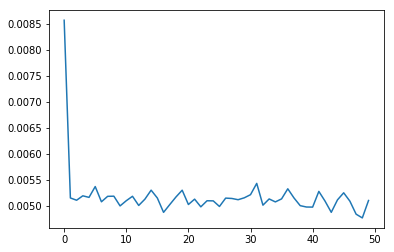

In [47]:
plt.plot(t_elapse[:50])

In [ ]:
j_pos_rel = [0, 0, 0, 0, 0, -20]  # move for Indy7
# j_pos_rel = [0, 0, 0, 0, 0, 0, -20]  # move for IndyRP2
indy.joint_move_by(j_pos_rel)

In [ ]:
t_pos1[2] += 0.1
indy.task_move_to(t_pos1)  # Move along z-axis

In [ ]:
t_pos_rel = [0, 0, -0.1, 0, 0, 0]
indy.task_move_by(t_pos_rel)

In [14]:
idx = 16

indy.set_do(idx, True)
sleep(1)
indy.set_do(idx, False)

In [48]:
indy.disconnect()